In [9]:
import sys
!{sys.executable} -m pip install pythainlp
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install attacut
!{sys.executable} -m pip install multidict

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [2]:
from pythainlp import sent_tokenize, word_tokenize
import multidict as multidict
import re
import pythainlp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [24]:
text = """
ตื่นสายครับ เมื่อคืนท้องเสีย ท้องเสียทั้งคืนไม่ได้นอนเลยค่ะ ขอพัก 1 วันค่ะ ท้องเสียไม่ไหวแล้วครับ มึนหัว ขอกลับไปพักนะครับ
กำลังเข้าไปครับ ปวดท้องบิดหนักมาก ท้องเสียค่ะ หมดแรงเลย เดี๋ยวทานยาพักก่อนนะคะ ขอโทษด้วยค่ะ รู้สึกยังไม่ไหว ปวดท้องบิดท้องเสียอยู่ค่ะ ขอพัก1 วันนะคะ ขอโทษด้วยค่ะ
ท้องเสียค่ะ ปวดท้องบิด ขอกลับก่อนนะคะท้องเสีย ไม่ค่อยได้นอนเลยครับยังท้องเสียอยู่ คิดว่าอาหารเป็นพิษ...ซาลาเปาหมูสับไม่ไว้ใจครับ
ท้องเสีย ขอลา 1 วันครับ ท้องเสียครับ กำลังเข้าไปครับ ไอหนัก เป็นหวัดครั่นเนื้อครั่นตัวค่ะ มีท้องเสียด้วย เลยจะขอกินยาพัก ขอโทษด้วยค่ะ
ไอหนัก เป็นหวัดครั่นเนื้อครั่นตัวค่ะ มีท้องเสียด้วย เลยจะขอกินยาพัก ขอโทษด้วยค่ะ ท้องเสียครับ ถึงออฟฟิศแล้วครับ
ท้องเสีย มีไข้ คิดว่าอาหารเป็นพิษครับ ท้องเสียค่ะ ปวดท้องบิดเรียบร้อยแล้วจะรีบเข้าไปค่ะ
ท้องเสียครับ เข้าห้องน้ำตลอดตั้งแต่เช้าครับ ท้องเสียครับ ถ่ายเป็นน้ำ หลายรอบแล้ว
สายแปปนึงนะคะ ท้องเสียยำเมื่อคืนค่ะ เสร็จแล้วจะรีบเข้าไปค่ะ สายแปปนึงนะคะ ท้องเสียยำเมื่อคืนค่ะ เสร็จแล้วจะรีบเข้าไปค่ะ
ท้องเสียตั้งแต่เมื่อคืน เช้านี้ยังจู้ดๆ อยู่ 
อาหารเป็นพิษครับ เริ่มมีไข้ครับ
สายแปปนึงนะคะ ท้องเสียยำเมื่อคืนค่ะ เสร็จแล้วจะรีบเข้าไปค่ะ
ท้องเสียครับ กำลังเข้าไปครับ
ตอนนี้ท้องเสียหลายรอบ ดีขึ้นละจะรีบเข้าไปค่ะ 
ท้องเสียค่ะ ปวดท้อง เข้าห้องน้ำทั้งคืนเลยไม่ได้นอนเลย น่าจะเป็นเพราะข้าวราดแกง ขอลาพัก 1 วันนะคะ
ยังมีอาการท้องเสียและอ่อนเพลียตั้งแต่เมื่อวานอยู่ค่ะ ขอลาพักอีกหนึ่งวันค่ะ ขอโทษด้วยค่ะ
ท้องเสียค่ะ เรียบร้อยเดี๋ยวรีบออกไปค่ะ
ลาทั้งวันนะคะ อาหารเป็นพิษไปหาหมอได้น้ำเกลือกับยาแล้วค่ะ แต่คงต้องพักตอนนี้ดีขึ้นนิดๆแล้วค่ะ เดี๋ยวตอนเย็นเข้าประชุมค่ะ ขอโทษด้วยค่ะ 
ท้องเสียครับ ถ่ายเป็นน้ำ ยังมาเรื่อยๆ แต่ยังนั่งทำงานไหวครับ มีอะไรทักมาได้เลยครับ ท้องเสียเรื่อยๆตั้งแต่วันจันทร์ดึกๆครับ
เมื่อคืนก็ถ่ายไม่หยุดไม่ได้นอนเลย ปวดท้องบิดๆ ท้องเสียค่ะยังไม่หาย เดี๋ยวชดเชยวันนี้ค่ะ ยังไม่หายปวดท้องเลยค่ะ ขอเปลี่ยนเป็นลาเข้าเลยนะคะ ขอโทษด้วยค่ะ 
ตื่นมาปวดท้องบิด ๆ บอกท้องเสีย ยังไม่ดีขึ้นครับ
ท้องเสียตอนเช้าค่ะ เสร็จแล้วเดี๋ยวรีบเข้าไปค่ะ เดี๋ยวขดเชยให้ค่ะ
เปลี่ยนเป็นลาป่วยเช้านะคะ ยังไม่หยุดเลยค่ะ ขอโทษด้วยค่ะ
ท้องเสียค่ะ ท้องยังบิดๆ ยังไม่หายเลย หยุดแล้วจะรีบเข้าไปค่ะ
ท้องเสียครับ เข้าห้องน้ำหลายรอบ น่าจะดีขึ้นแล้วคับ กำลังเข้าไปครับ
ท้องเสีย ขอพักเช้าก่อนนะคะ พี่ภูมิพอจะอธิบายได้ไหมครับว่าท้องเสียเพราะอะไร
ท้องเสียจากยาแก้ข้ออักเสบ มาถึงที่ทำงานแล้วครับ
ท้องเสียครับ เดี๋ยวดีแล้วรีบเข้าไปครับ มีไข้สูง ปวดเมื่อยมั้งตัวมากครับ ตอนนี้กินแต่อาหารเบาๆก็ยังท้องเสียครับ ขอโทษครับ เมื่อคืนท้องเสียตลอดคืนเลยครับ แทบไม่ได้นอน กำลังเข้าไปออฟฟิศครับ ท้องเสียยาวๆตั้งแต่ตี3 อาการดีขึ้นเดียวรีบเข้าไปนะครับ ขอเปลี่ยนเป็นทั้งวันนะครับ ยังท้องเสียอยู่เรื่อยๆ เดียวถ่ายรอบนี้เสร็จไปหาหมอแล้วครับ ไม่ไหวแล้ว มีไข้ ปวดท้องและท้องเสียค่ะ ตื่นมายังรู้สึกเพลียอยู่ ขอลาพักหนึ่งวันค่ะ ขอโทษด้วยนะคะ ท้องเสียครับ ขอทำงานที่บ้านครึ่งวันนะครับ ท้องเสียมาตั้งแต่เช้าค่ะ เลยไม่ค่อยได้ทำงานดีเลย ขอเปลี่ยนเป็นลาป่วยทั้งวันนะคะวันนี้ 
เดี๋ยวขอพักแปปหนึ่งแล้วกลับมาทำต่อค่ะ
"""

In [25]:
tokens = word_tokenize(text, keep_whitespace=False)


In [26]:
keywords = multidict.MultiDict()
tmpdict = {}

for text in tokens:
    if(text in pythainlp.corpus.common.thai_stopwords() or re.match('[0-9]+|\-|\.',text)):
        continue
    val = tmpdict.get(text, 0)
    tmpdict[text.lower()] = val + 1
for key in tmpdict:
    keywords.add(key, tmpdict[key])

In [37]:
pooemoji = np.array(Image.open('./images/pooemoji.png'))

wordcloud = WordCloud(font_path='./fonts/BaiJamjuree-Regular.woff',
                      background_color="white",
                      width=4096,
                      height=2160,
                      max_words=200,
                      collocations=False,
                      stopwords=list(pythainlp.corpus.common.thai_stopwords()),
                      mask=pooemoji)

wordcloud.generate_from_frequencies(keywords)

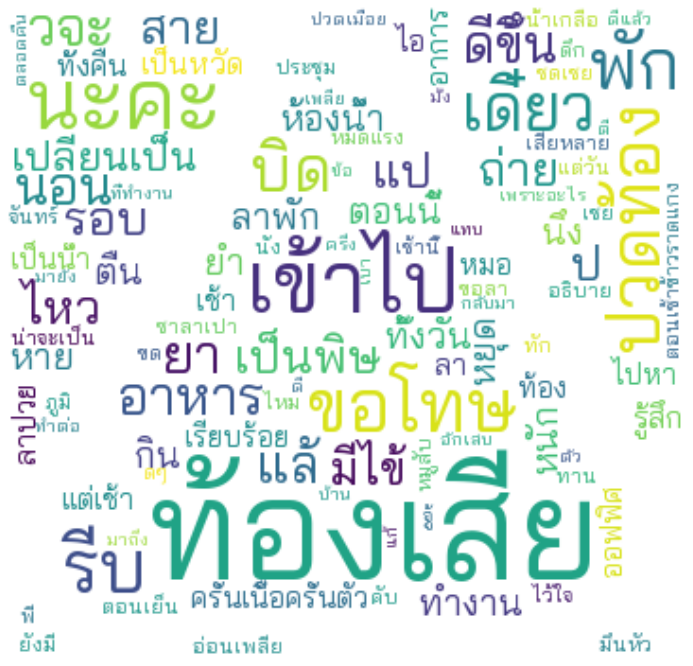

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.savefig('./images/tongsia-wordcloud-output.png')